<a href="https://colab.research.google.com/github/jay10440/full-statistical-projects/blob/main/Final_Grade_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Grade Percentage Comparison

In Spring of 2025, we were tasked to comply with the changes of uniformity to our grading policies. Namely the following:
 - Homework Grades: 30%
 - Final Exam Grades: 20 %
 - Exams: 50 %

 Some of us were happy. Some weren't. Nevertheless, we wanted to see what the success rates looked like for the students, and if there would be better success rates when we ran the numbers for comparison percentages.

 The two percentage options we will compare are the following:

 - Unit Exams: 50%, Final exam 30%, Homework 20%
 - Unit Exams: 40%, Final exam 32%, Homework 28%

In [2]:
#Installing necessary packages to do the data analysis:
install.packages(c("dplyr","ggplot2","readr","pacman"))
install.packages(c("graphics","grid","gridExtra"))

#Loading up the packages:
pacman::p_load(dplyr,ggplot2,readr,graphics,grid,gridExtra)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#Loading in the grades:
raw_data<- read_csv("25SP_F2_MAT110_W10_Grades.csv")
#Keeping the final grades, and renaming it grades:
#D2L's output is ugly. Let's take out all of the grade names and
#call the final grade column just Grade:
grades<-raw_data %>%
  select(`Calculated Final Grade Numerator`) %>%
  rename(Grade = `Calculated Final Grade Numerator`)

#Just in case, clean up blanks and NAs
grades <- grades %>% filter(!is.na(Grade))

#Doublechecking the names of stuff
head(grades)

Rows: 26 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): OrgDefinedId, End-of-Line Indicator
dbl (2): Calculated Final Grade Numerator, Calculated Final Grade Denominator

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Grade
<dbl>
97.8200
88.6250
80.5500
95.7375
83.7625
85.3175


In [7]:
#Setting up and cleaning the data:
str(grades) #determining the structure of the data
grades<- grades %>% filter(!is.na(Grade)) # gets rid of NA values
summary(grades$Grade) #Basic statistics

tibble [26 × 1] (S3: tbl_df/tbl/data.frame)
 $ Grade: num [1:26] 97.8 88.6 80.5 95.7 83.8 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   75.90   83.50   77.52   95.17   99.14 

In [42]:
quartiles<- summary(grades$Grade)
quartileprint<- function(x){
  print(paste("The minimum value of the grades is", quartiles["Min."]))
  print(paste("The first quartile of the grades is", quartiles["1st Qu."]))
  print(paste("The first quartile of the grades is", median(x)))
  print(paste("The first quartile of the grades is", quartiles["3rd Qu."]))
  print(paste("The first quartile of the grades is", max(x)))
}

quartileprint(grades$Grade)

[1] "The minimum value of the grades is 0"
[1] "The first quartile of the grades is 75.901875"
[1] "The first quartile of the grades is 83.50375"
[1] "The first quartile of the grades is 95.171875"
[1] "The first quartile of the grades is 99.145"


#Making a BoxPlot and Histogram

We do care about the curve of the grades. Notably, grades often follow a normal distribution (though, this is not always true. Some may follow Gamma or Beta distributions as priors which can then be "transformed" into normal distribution posteriors: this is important if alternative grading methods are performed).

Below we show a boxplot and a histogram, then some basic statistics.

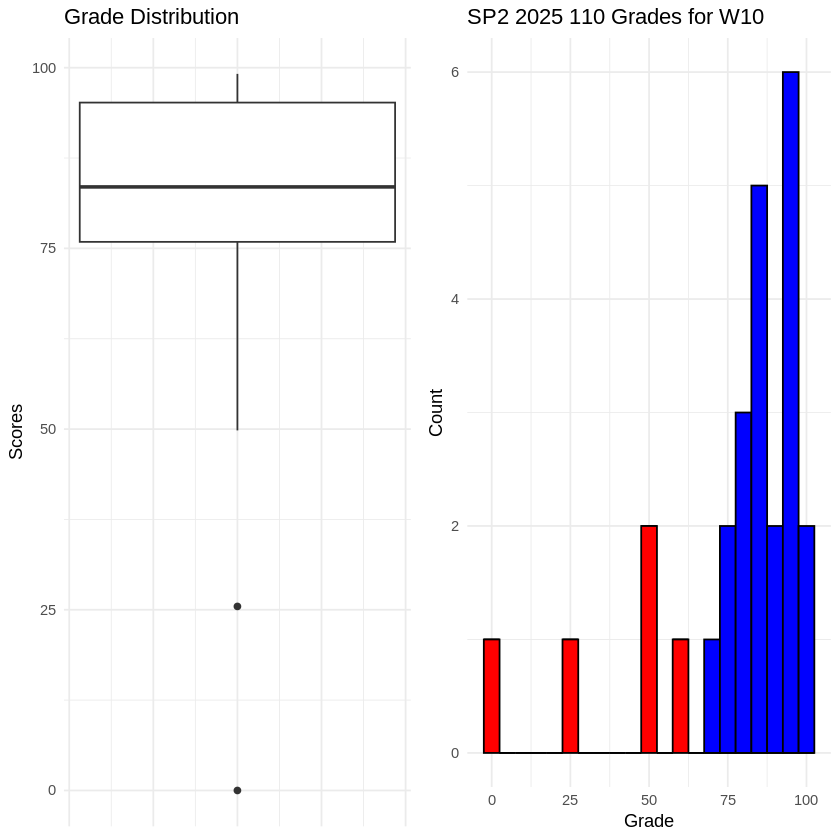

In [37]:
#Since I'm stubborn and want the grids side by side, I decided I'm going
#to use the grid extra package to make it happen.
#boxplot_grob<- grid::grid.grabExpr(
#  boxplot(grades$Grade, main="Grade Distribution", ylab="Scores")
#)

# Create the boxplot using ggplot2
boxplot_grob <- ggplot(grades, aes(y = Grade)) +
  geom_boxplot() +
  labs(title = "Grade Distribution", y = "Scores") +
  theme_minimal() +
  # Remove the x-axis labels and ticks as it's a single boxplot
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank())


#Here, I'm just making it to where I can show the colors for passing and
#failing.
grades<- grades %>%
  mutate(Color = ifelse(Grade < 65, "red","blue"))

p<-ggplot(grades, aes(x= Grade, fill=Color)) +
  geom_histogram(binwidth=5, color = "black") +
    scale_fill_identity() +
      theme_minimal() +
        labs(title = "SP2 2025 110 Grades for W10", x="Grade",y="Count")

#Side-by-side ness:
grid.arrange(boxplot_grob, p, ncol=2)

#Basic Statistics

Below are the mean, median, variance, along with the number of students who passed and the success rates.

[1] "The mean final average is 77.5161538461538"
[1] "The median final average is 83.50375"
[1] "The variance, skewed, is 561.715397115385"
[1] "The total number of students who passed is 21 out of 26"
[1] "The success rate for this course is 80.77 %"


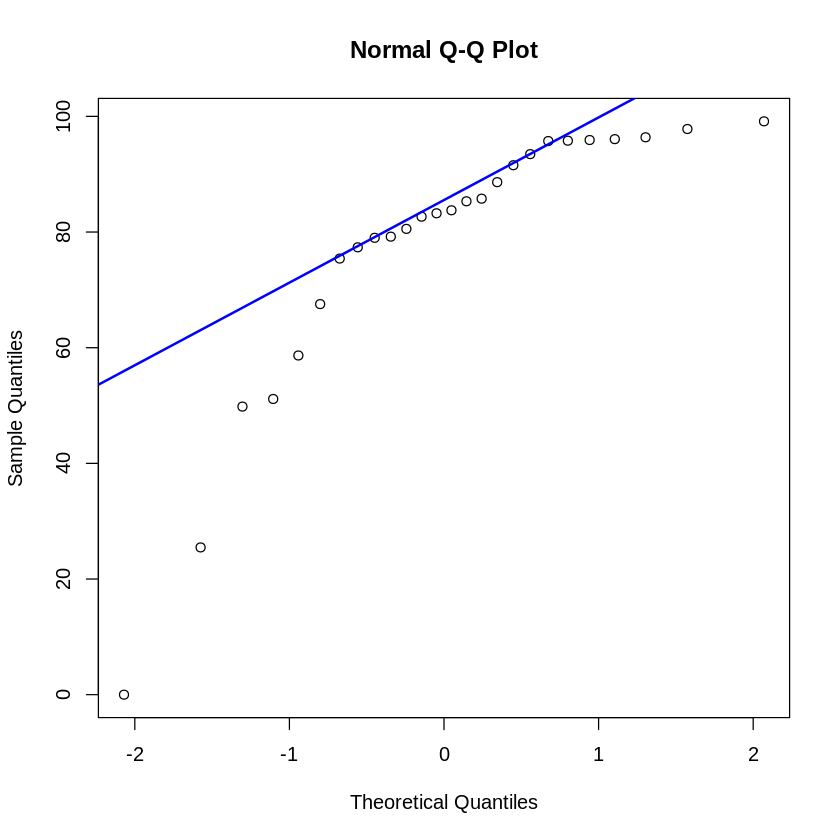

In [38]:
#Some data analysis.
base_statistics <- function(x){
  total_count<- length(x)
  pass_count<- sum(x>65)
  success_rate<- round(100*pass_count / total_count, 2)
  print(paste("The mean final average is", mean(x)))
  print(paste("The median final average is", median(x)))
  print(paste("The variance, skewed, is", var(x)))
  print(paste("The total number of students who passed is", pass_count, "out of", total_count))
  print(paste("The success rate for this course is", success_rate, "%"))
}

base_statistics(grades$Grade)

#An Extra Test for Normality

Just checking our basis

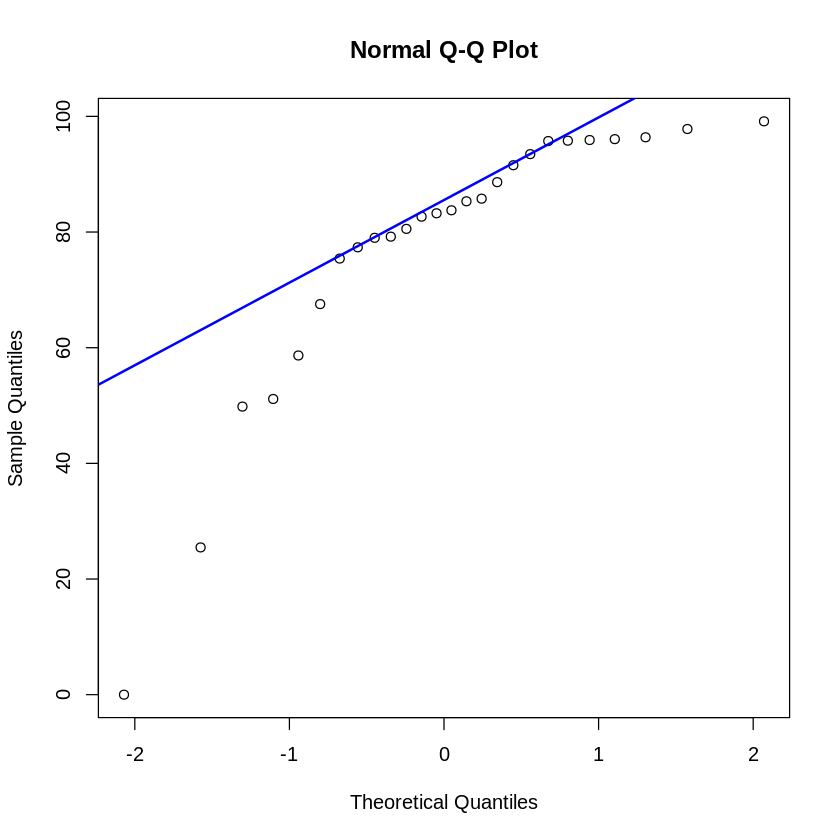

In [43]:
#Checking for normality:
qqnorm(grades$Grade)
qqline(grades$Grade, col= "blue", lwd=2)

In [ ]:
#This section may be left blank depending on time constraints.

#Qualities of a beta distribution is that it has to be between 0 and 1.
#This is nice because we have a scale of 100. Divide each value by 100.